**Installing libraries**

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn




**Loading the dataset**

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/car data.csv')  # Update the path accordingly






**Data exploration-Displaying first few rows**

In [3]:
df.head()
ing

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Checking for missing values

In [4]:
df.isnull().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


**Basic statistics**

In [5]:
df.describe()



,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Checking the data types of each column**

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Data preprocessing**

In [7]:
# Drop 'Car_Name' as it is not useful for prediction
df = df.drop(['Car_Name'], axis=1)

# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)



**Feature engineering**

In [8]:
# Calculate the age of the car
df['Car_Age'] = 2024 - df['Year']  # Assuming the current year is 2024
df = df.drop(['Year'], axis=1)  # Drop the original Year column


**Feature scaling**

In [9]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_features = ['Present_Price', 'Driven_kms', 'Owner', 'Car_Age']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


**Splitting the data**

In [10]:
from sklearn.model_selection import train_test_split

# Separate the target variable and features
X = df.drop('Selling_Price', axis=1)  # Features
y = df['Selling_Price']               # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Selection and Training**

In [11]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Evaluation**

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')


MAE: 1.2163740193330423, MSE: 3.4813498305118595, R2: 0.8488707839193136


**Prediction**

In [14]:
# Example of new input data
new_data = pd.DataFrame({
    'Present_Price': [5.59],  # Example value, scale it as needed
    'Driven_kms': [27000],    # Example value, scale it as needed
    'Owner': [0],             # Example value, scale it as needed
    'Car_Age': [5],           # Example value, scale it as needed
    'Fuel_Type_Diesel': [0],  # Example value (0 for Petrol, 1 for Diesel)
    'Fuel_Type_Petrol': [1],  # Example value (0 for Petrol, 1 for Petrol)
    'Selling_type_Individual': [1], # Example value (0 for Dealer, 1 for Individual)
    'Transmission_Manual': [1]     # Example value (0 for Automatic, 1 for Manual)
}, index=[0]) #Adding an index to the dataframe

# Get the column names from the training data
X_train_columns = X_train.columns

# Reorder the columns in new_data to match X_train
new_data = new_data[X_train_columns]

# Scale the new data
new_data[numerical_features] = scaler.transform(new_data[numerical_features])

# Make prediction
prediction = model.predict(new_data)
print(f'Predicted Price: {prediction[0]}')


Predicted Price: 4.508425964499962


** Residual Plot**

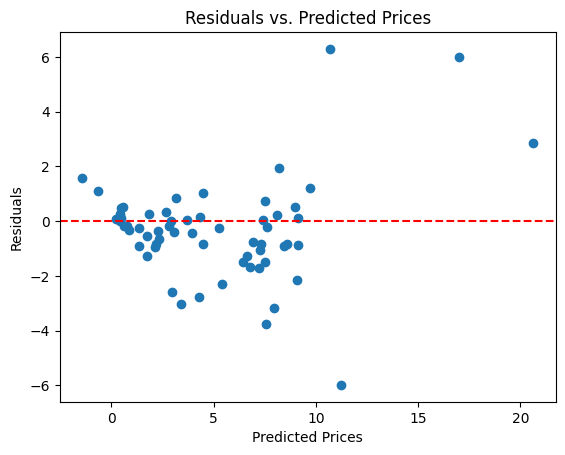

In [16]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

